In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.utility_functions import gen_data_dict, get_data, error_count, opart, SquaredHingeLoss, show_error_rate, plot_feature_targets

np.set_printoptions(precision=3)
np.random.seed(123)
torch.manual_seed(123)

In [2]:
# target
target_df_1 = pd.read_csv('C:/Users/tln229/Downloads/ML_ChangepointDetection/1_genome/1_training_data/target_lambda_fold1_base_e.csv')
target_df_2 = pd.read_csv('C:/Users/tln229/Downloads/ML_ChangepointDetection/1_genome/1_training_data/target_lambda_fold2_base_e.csv')

targets_low_1  = torch.FloatTensor(target_df_1.iloc[:, 1:2].to_numpy())
targets_high_1 = torch.FloatTensor(target_df_1.iloc[:, 2:3].to_numpy())
targets_low_2  = torch.FloatTensor(target_df_2.iloc[:, 1:2].to_numpy())
targets_high_2 = torch.FloatTensor(target_df_2.iloc[:, 2:3].to_numpy())

y1_raw = torch.cat((targets_low_1, targets_high_1), dim=1)
y2_raw = torch.cat((targets_low_2, targets_high_2), dim=1)

y1_raw = torch.log(10**y1_raw)
y2_raw = torch.log(10**y2_raw)

In [3]:
# data features
data = pd.read_csv('C:/Users/tln229/Downloads/ML_ChangepointDetection/1_genome/1_training_data/seq_features.csv')['count'].to_numpy()
data = np.log(np.log(data)).reshape(-1,1)
X = torch.FloatTensor(data)

In [14]:
# filter
y1 = torch.mean(y1_raw, axis=1).reshape(-1,1)
y2 = torch.mean(y2_raw, axis=1).reshape(-1,1)

In [15]:
print(len(X), len(y1))
print(len(X), len(y2))

413 413
413 413


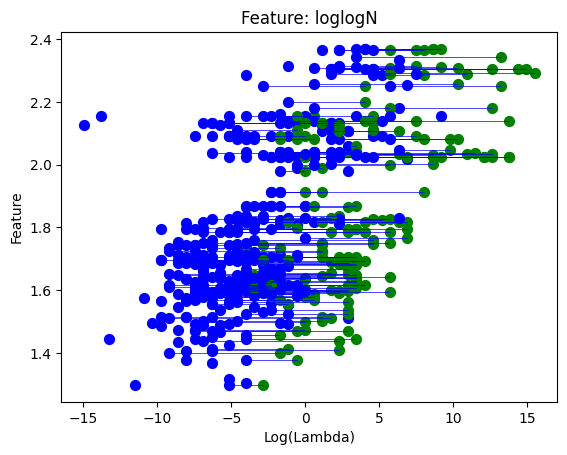

None


In [11]:
print(plot_feature_targets(X.numpy(), y1_raw[:,0].numpy(), y1_raw[:,1].numpy(), None, 'loglogN'))

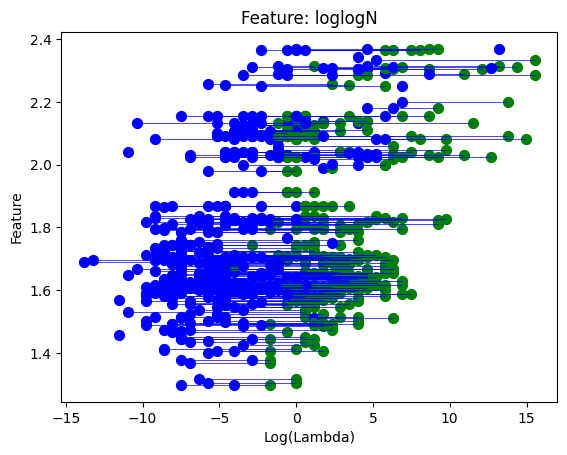

None


In [12]:
print(plot_feature_targets(X.numpy(), y2_raw[:,0].numpy(), y2_raw[:,1].numpy(), None, 'loglogN'))

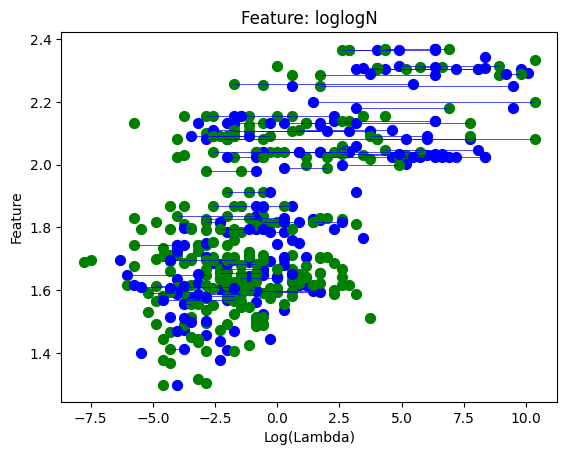

None


In [16]:
print(plot_feature_targets(X.numpy(), y1, y2, None, 'loglogN'))